In [7]:
from MakeLightcurves import *
from parameters import *

In [22]:
tic = 69747919

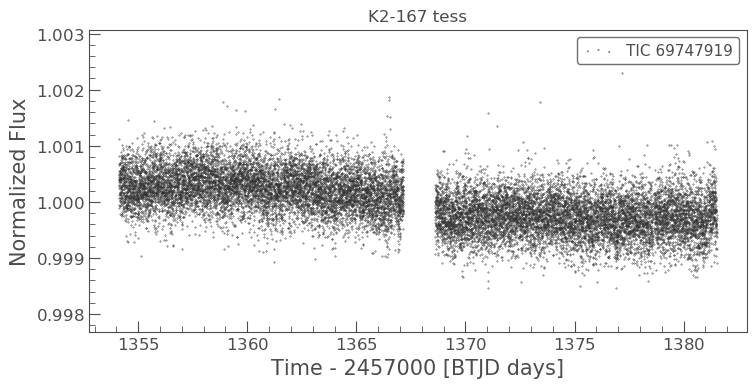

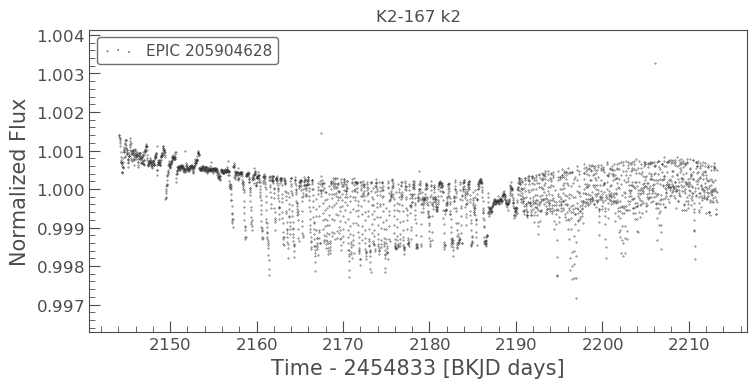

In [4]:
plot_lc(tic=tic,mission='tess')
plot_lc(tic=tic,mission='k2')

In [24]:
hostname = get_star_name(tic)
print(hostname)

K2-167


In [10]:
period, t0, dur, depth, impact_param, r_planet, r_star = get_params(hostname)

In [11]:
from astropy.time import *

In [20]:
now = Time.now().jd
latest_transit = t0
transits = []
while latest_transit < now:
    transits.append(latest_transit)
    latest_transit += period  
print(now)
print(latest_transit)

2458573.2287150375
2458576.33374002


In [21]:
crossmatch_planets = pandas.read_csv('data/crossmatch_planets.csv')

In [54]:
index = crossmatch_planets.index[crossmatch_planets['TIC'] == tic].tolist()
tess_sector = crossmatch_planets['sector'][index].tolist()[0]
tess_sector = 7
print(tess_sector)

7


In [50]:
times_tess = pandas.read_csv('data/times_TESS.csv')

In [55]:
sector_index = times_tess.index[times_tess['sector'] == tess_sector].tolist()
start_jd = times_tess['start_jd'][sector_index].tolist()[0]
end_jd = times_tess['end_jd'][sector_index].tolist()[0]
print(start_jd,end_jd)

2458490.5 2458516.5


In [56]:
overlap_transits = [t for t in transits if t > start_jd and t < end_jd]

In [57]:
print(overlap_transits)
print([i - 2457000 for i in overlap_transits])

[2458496.513892019, 2458506.4913730193, 2458516.4688540194]
[1496.5138920191675, 1506.491373019293, 1516.4688540194184]


In [ ]:
# generate all transit times - done
# get k2 campaign
# get tess sector
# get k2 campaign times
# get tess sector times
# extract times within bounds
# add to a dictionary
# return